In [1]:
import pandas as pd
import requests
import pprint
from pymongo import MongoClient
from bs4 import BeautifulSoup
import json
import time
from lxml import html
from io import StringIO
from datetime import datetime

# Josh Reddick
Reddick played for the following teams earlier in his career:

- 2009-2011 Boston Redsox
- 2012-2016 Oakland Athletics (traded mid 2016)
- 2016      Los Angeles Dodgers
- 2017      Houston Astros

In [4]:
urls = ['https://www.retrosheet.org/boxesetc/2009/Ireddj0010012009.htm',
        'https://www.retrosheet.org/boxesetc/2010/Ireddj0010022010.htm',
        'https://www.retrosheet.org/boxesetc/2011/Ireddj0010032011.htm',
        'https://www.retrosheet.org/boxesetc/2012/Ireddj0010042012.htm',
        'https://www.retrosheet.org/boxesetc/2013/Ireddj0010052013.htm',
        'https://www.retrosheet.org/boxesetc/2014/Ireddj0010062014.htm',
        'https://www.retrosheet.org/boxesetc/2015/Ireddj0010072015.htm',
        'https://www.retrosheet.org/boxesetc/2016/Ireddj0010082016.htm',
        'https://www.retrosheet.org/boxesetc/2016/Ireddj0010092016.htm',
        'https://www.retrosheet.org/boxesetc/2017/Ireddj0010102017.htm']

csv_names = ['csv_from_scrape/reddick_2009_df.csv',
             'csv_from_scrape/reddick_2010_df.csv',
             'csv_from_scrape/reddick_2011_df.csv',
             'csv_from_scrape/reddick_2012_df.csv',
             'csv_from_scrape/reddick_2013_df.csv',
             'csv_from_scrape/reddick_2014_df.csv',
             'csv_from_scrape/reddick_2015_df.csv',
             'csv_from_scrape/reddick_2016_1_df.csv',
             'csv_from_scrape/reddick_2016_2_df.csv',
             'csv_from_scrape/reddick_2017_df.csv']

years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2016', '2017']

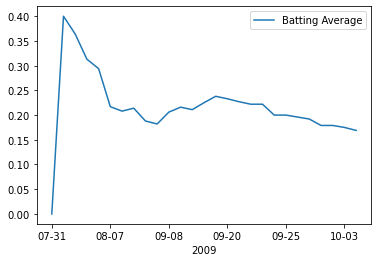

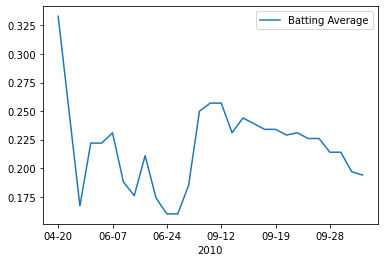

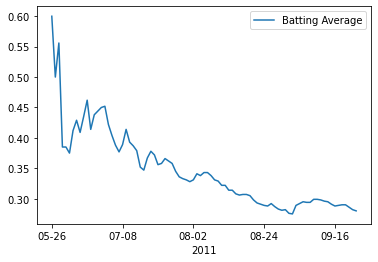

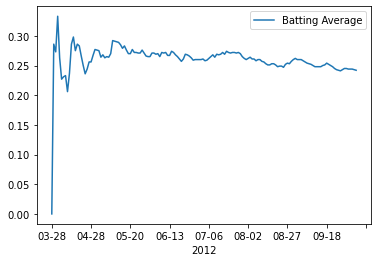

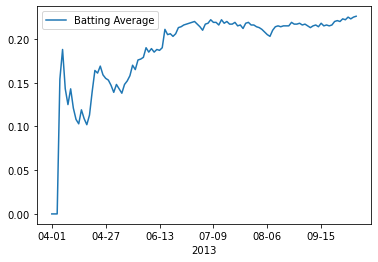

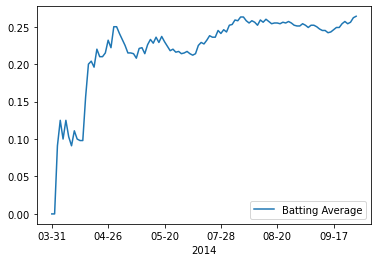

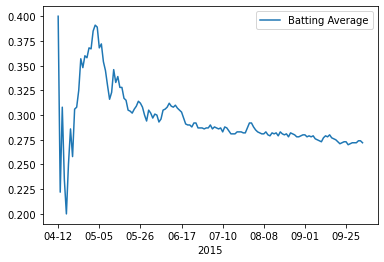

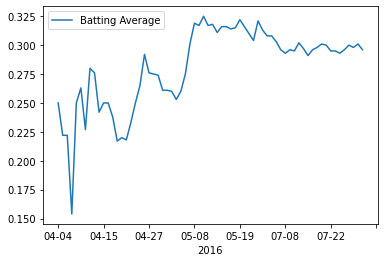

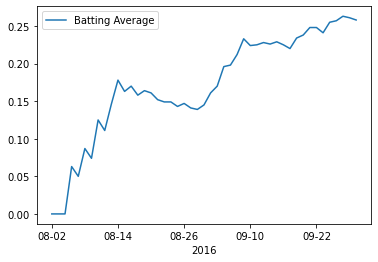

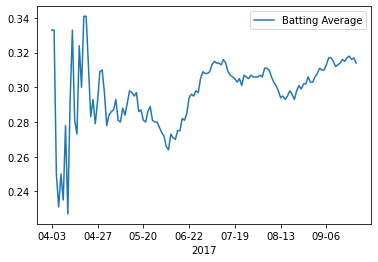

In [7]:
for idx, url in enumerate(urls):
    
    # batting averages

    xpath = "//pre[5]/text()"
    r = requests.get(url)
    page = html.parse(StringIO(r.text))
    batter = page.xpath(xpath)
    
    batter_game_data_only = []
    for a, row in enumerate(batter):
        if a % 2 == 0:
            batter_game_data_only.append(row)
    
    batter_game_data_cleaned = []
    for row in batter_game_data_only[1:]:
        if len(row) > len(batter_game_data_only[2]):
            batter_game_data_cleaned.append(row[0:112])
        else:
            batter_game_data_cleaned.append(row)
        
    batter_averages = [float(row[87:91]) for row in batter_game_data_cleaned]

    # dates played this year

    soup = BeautifulSoup(r.text, 'html.parser')
    
    link_text = []
    for a in soup.find_all('a'):
        link_text.append(a.string)
        
    batter_dates = []
    for i in link_text:
        if years[idx] in i:
            batter_dates.append(i)
            
    batter_dates_cleaned = []
    for date in batter_dates:
        batter_dates_cleaned.append(date.replace(' ', '0'))
        
    batter_dates_final = []
    for date in batter_dates_cleaned:
        batter_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
        
    batter_df = pd.DataFrame(batter_averages, batter_dates_final).reset_index()
    batter_df.columns = [years[idx], 'Batting Average']
    batter_df.to_csv(csv_names[idx])
    batter_df.plot(years[idx], 'Batting Average')